In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
raw_data = pd.read_csv("2.01.csv")
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({"Yes":1,"No":0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [5]:
y = data['Admitted']
x1 = data['SAT']

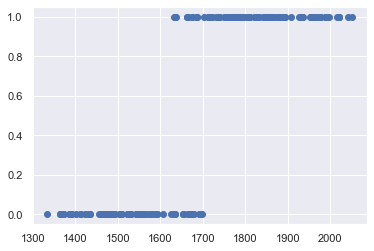

In [6]:
plt.scatter(x1,y,color='C0')

In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [8]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Dec 2020   Pseudo R-squ.:                  0.7992
Time:                        17:46:40   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Binary Predictors

In [10]:
raw_data = pd.read_csv('2.02.csv')
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({"Yes":1,"No":0})
data['Gender'] = data['Gender'].map({"Female":1,"Male":0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [14]:
x1 = data[['Gender','SAT']]
y = data['Admitted']

x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Dec 2020   Pseudo R-squ.:                  0.8249
Time:                        22:17:04   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

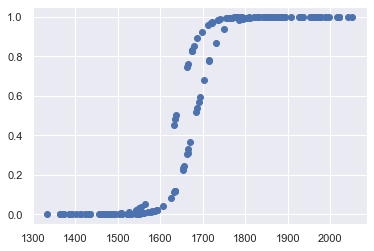

In [22]:
plt.scatter(data['SAT'],results_log.predict(x))

## Confusion Matrix

In [25]:
cm = pd.DataFrame(results_log.pred_table())
cm.columns = ['Predicted 0', 'Predicted 1']
cm = cm.rename(index={0:'Actual 0', 1:'Actual 1'})
cm

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [36]:
t = results_log.pred_table()
print("Accuracy was {0:.2f}%".format((t[0][0]+t[1][1]-t[0][1]-t[1][0])/(t[0][0]+t[1][1])*100))

Accuracy was 94.34%


In [39]:
test = pd.read_csv('2.03.csv')
test['Admitted'] = test['Admitted'].map({"Yes":1,"No":0})
test['Gender'] = test['Gender'].map({"Female":1,"Male":0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [46]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data = test_data[x.columns.values]
test_data

,const,Gender,SAT
0,1.0,0,1323
1,1.0,1,1725
2,1.0,1,1762
3,1.0,0,1777
4,1.0,0,1665
5,1.0,1,1556
6,1.0,1,1731
7,1.0,1,1809
8,1.0,1,1930
9,1.0,0,1708


In [64]:
def confusion_matrix(data, actual_values, model):
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm,accuracy

In [66]:
cmm = confusion_matrix(test_data, test_actual, results_log)
cm = pd.DataFrame(cmm[0])
cm.columns = ['Predicted 0', 'Predicted 1']
cm = cm.rename(index={0:'Actual 0', 1:'Actual 1'})
cm

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [67]:
print("Model is {0:.2f}% accurate".format(cmm[1]*100))

Model is 89.47% accurate
